In [ ]:
%ls

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    Conventions: CF-1.4
    version: 1.0
    comment: Averaged from 6-hourly CRUNCEP tair data
    dimensions(sizes): lon(720), lat(360), time(12), nv(2)
    variables(dimensions): |S1 crs(), float64 lon(lon), float64 lat(lat), float64 time(time), float64 lon_bnds(lon,nv), float64 lat_bnds(lat,nv), float64 time_bnds(time,nv), float64 Tair_monthly(time,lat,lon)
    groups: 



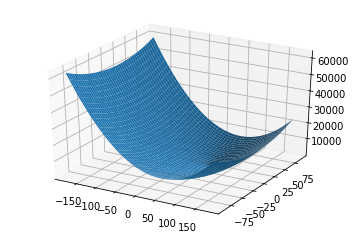

In [108]:
# %load netcdf.py
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
f= netCDF4.Dataset('data/mstmip_driver_global_hd_climate_tair_monthly_mean_1901_v1.nc4')
print(f)
lat=f.variables['lat']
lon=f.variables['lon']
airt=f.variables['Tair_monthly']

latvals = lat[:]; lonvals = lon[:] 
# a function to find the index of the point closest pt
# (in squared distance) to give lat/lon value.
def dist(lats,lons,latpt,lonpt):
    # find squared distance of every point on grid
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2  
    return dist_sq

def getclosest_ij(lats,lons,latpt,lonpt):
    # find squared distance of every point on grid
    # 1D index of minimum dist_sq element
    minindex_flattened = dist(lats,lons,latpt,lonpt).argmin()    
    # Get 2D index for latvals and lonvals arrays from 1D index
    tup=np.unravel_index(minindex_flattened, lats.shape)
    return tup


LAT,LON=np.meshgrid(lonvals,latvals)
jena_lat,jena_lon=(50,11)

f=plt.figure()
ax=f.add_subplot(1,1,1,projection='3d')
cs=ax.plot_surface(LAT, LON,dist(LAT,LON,50,11))
i_lat,i_lon= getclosest_ij(LAT, LON,jena_lat,jena_lon)

In [90]:
#%matplotlib inline
#tair=f.variables['Tair_monthly']
#print(tair)
#for dname in tair.dimensions:
#    print(f.variables[dname])

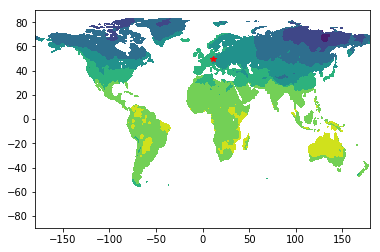

In [105]:
#plot temperature for January
f=plt.figure()
ax=f.add_subplot(1,1,1)
cs=ax.contourf(LAT,LON,tair[0,:,:])
ax.plot(lat[i_lat],lon[i_lon],'*',color="red")

In [111]:
Jena_tmp=airt[:,i_lat,i_lon]
np.append(Jena_tmp,Jena_tmp)

masked_array(data=[296.6541748 , 297.98782349, 299.8835144 , 302.08685303,
                   303.78396606, 304.29071045, 303.69076538, 303.39562988,
                   303.37884521, 300.9883728 , 298.57723999, 297.0874939 ,
                   296.6541748 , 297.98782349, 299.8835144 , 302.08685303,
                   303.78396606, 304.29071045, 303.69076538, 303.39562988,
                   303.37884521, 300.9883728 , 298.57723999, 297.0874939 ],
             mask=False,
       fill_value=1e+20)

In [114]:
Jena_tmp
alltime=np.array([])
for year in range (1901,2011):
    filename= ('data/mstmip_driver_global_hd_climate_tair_monthly_mean_'+str(year)+'_v1.nc4')
    f= netCDF4.Dataset(filename)
    alltime=np.append(alltime,f.variables['Tair_monthly'][:,i_lat,i_lon])
    

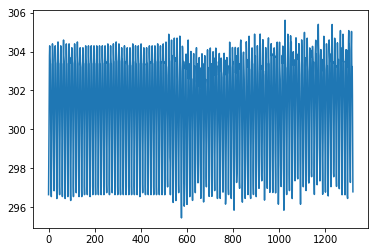

In [117]:
alltime.shape

plt.plot(alltime)